In [ ]:
import sys
import pandas as pd
import numpy as np
import scipy as sp
import datetime as dtt
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
from IPython.display import display, HTML
from pandas.plotting import andrews_curves

FL_DATE = "FL_DATE"
UNIQUE_CARRIER = "UNIQUE_CARRIER"
AIRLINE_ID = "AIRLINE_ID"
CARRIER = "CARRIER"
FL_NUM = "FL_NUM"
ORIGIN_AIRPORT_ID = "ORIGIN_AIRPORT_ID"
ORIGIN_AIRPORT_SEQ_ID = "ORIGIN_AIRPORT_SEQ_ID"
ORIGIN_CITY_MARKET_ID = "ORIGIN_CITY_MARKET_ID"
ORIGIN = "ORIGIN"
ORIGIN_CITY_NAME = "ORIGIN_CITY_NAME"
ORIGIN_STATE_ABR = "ORIGIN_STATE_ABR"
ORIGIN_STATE_NM = "ORIGIN_STATE_NM"
DEST_AIRPORT_ID = "DEST_AIRPORT_ID"
DEST_AIRPORT_SEQ_ID = "DEST_AIRPORT_SEQ_ID"
DEST_CITY_MARKET_ID = "DEST_CITY_MARKET_ID"
DEST = "DEST"
DEST_CITY_NAME = "DEST_CITY_NAME"
DEST_STATE_ABR = "DEST_STATE_ABR"
DEST_STATE_NM = "DEST_STATE_NM"
DEP_TIME = "DEP_TIME"
DEP_DELAY = "DEP_DELAY"
DEP_DELAY_NEW = "DEP_DELAY_NEW"
ARR_TIME = "ARR_TIME"
ARR_DELAY = "ARR_DELAY"
ARR_DELAY_NEW = "ARR_DELAY_NEW"
CANCELLED = "CANCELLED"
CANCELLATION_CODE = "CANCELLATION_CODE"
DIVERTED = "DIVERTED"
ACTUAL_ELAPSED_TIME = "ACTUAL_ELAPSED_TIME"
AIR_TIME = "AIR_TIME"
DISTANCE = "DISTANCE"
CARRIER_DELAY = "CARRIER_DELAY"
WEATHER_DELAY = "WEATHER_DELAY"
NAS_DELAY = "NAS_DELAY"
SECURITY_DELAY = "SECURITY_DELAY"
LATE_AIRCRAFT_DELAY = "LATE_AIRCRAFT_DELAY"


In [2]:
data = pd.read_csv("~/PycharmProjects/FlightDelaysProject/data/dataset_delays.csv")

In [10]:
reducedData = data[[AIRLINE_ID, CARRIER, ARR_DELAY, CANCELLED]]
reducedData = reducedData[pd.notnull(reducedData[AIRLINE_ID])]
reducedData = reducedData[pd.notna(reducedData[AIRLINE_ID])]
reducedData = reducedData[pd.notnull(reducedData[ARR_DELAY])]
reducedData = reducedData[pd.notna(reducedData[ARR_DELAY])]
reducedData = reducedData[reducedData[CANCELLED] < 1]
print(reducedData[ARR_DELAY].describe())
display(HTML(reducedData.describe().to_html()))

count    98968.000000
mean         2.862087
std         40.262160
min        -70.000000
25%        -15.000000
50%         -6.000000
75%          7.000000
max       1316.000000
Name: ARR_DELAY, dtype: float64


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>AIRLINE_ID</th>
      <th>ARR_DELAY</th>
      <th>CANCELLED</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>98968.000000</td>
      <td>98968.000000</td>
      <td>98968.0</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>19920.499768</td>
      <td>2.862087</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>std</th>
      <td>375.078707</td>
      <td>40.262160</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>min</th>
      <td>19393.000000</td>
      <td>-70.000000</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>19790.000000</td>
      <td>-15.000000</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>19805.000000</td>
      <td>-6.000000</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>20304.000000</td>
      <td>7.000000</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>max</th>
      <td>21171.000000</td>
      <td>1316.000000</td>
      <td>0.0</td>
    </tr>
  </tbody>
</table>

In [11]:
display(HTML(reducedData.groupby(AIRLINE_ID)[ARR_DELAY].describe().to_html()))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>count</th>
      <th>mean</th>
      <th>std</th>
      <th>min</th>
      <th>25%</th>
      <th>50%</th>
      <th>75%</th>
      <th>max</th>
    </tr>
    <tr>
      <th>AIRLINE_ID</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>19393</th>
      <td>20581.0</td>
      <td>3.845537</td>
      <td>30.129042</td>
      <td>-53.0</td>
      <td>-12.0</td>
      <td>-4.0</td>
      <td>9.0</td>
      <td>524.0</td>
    </tr>
    <tr>
      <th>19690</th>
      <td>1428.0</td>
      <td>-0.415266</td>
      <td>20.260302</td>
      <td>-51.0</td>
      <td>-7.0</td>
      <td>-3.0</td>
      <td>4.0</td>
      <td>507.0</td>
    </tr>
    <tr>
      <th>19790</th>
      <td>15497.0</td>
      <td>-2.832419</td>
      <td>42.816381</td>
      <td>-62.0</td>
      <td>-18.0</td>
      <td>-10.0</td>
      <td>0.0</td>
      <td>1079.0</td>
    </tr>
    <tr>
      <th>19805</th>
      <td>17358.0</td>
      <td>3.391520</td>
      <td>43.020275</td>
      <td>-58.0</td>
      <td>-14.0</td>
      <td>-5.0</td>
      <td>9.0</td>
      <td>1316.0</td>
    </tr>
    <tr>
      <th>19930</th>
      <td>3183.0</td>
      <td>2.508325</td>
      <td>39.504376</td>
      <td>-70.0</td>
      <td>-17.0</td>
      <td>-5.0</td>
      <td>9.0</td>
      <td>391.0</td>
    </tr>
    <tr>
      <th>19977</th>
      <td>9585.0</td>
      <td>-1.133438</td>
      <td>40.568681</td>
      <td>-70.0</td>
      <td>-19.0</td>
      <td>-10.0</td>
      <td>4.0</td>
      <td>1107.0</td>
    </tr>
    <tr>
      <th>20304</th>
      <td>10730.0</td>
      <td>9.286859</td>
      <td>48.306256</td>
      <td>-56.0</td>
      <td>-13.0</td>
      <td>-3.0</td>
      <td>12.0</td>
      <td>1316.0</td>
    </tr>
    <tr>
      <th>20366</th>
      <td>9987.0</td>
      <td>-1.977871</td>
      <td>33.169977</td>
      <td>-61.0</td>
      <td>-16.0</td>
      <td>-8.0</td>
      <td>2.0</td>
      <td>900.0</td>
    </tr>
    <tr>
      <th>20409</th>
      <td>5359.0</td>
      <td>8.162157</td>
      <td>40.956445</td>
      <td>-54.0</td>
      <td>-13.0</td>
      <td>-3.0</td>
      <td>14.0</td>
      <td>746.0</td>
    </tr>
    <tr>
      <th>20416</th>
      <td>2464.0</td>
      <td>14.275568</td>
      <td>42.197224</td>
      <td>-42.0</td>
      <td>-9.0</td>
      <td>3.0</td>
      <td>22.0</td>
      <td>892.0</td>
    </tr>
    <tr>
      <th>20436</th>
      <td>1712.0</td>
      <td>6.538551</td>
      <td>57.738824</td>
      <td>-52.0</td>
      <td>-19.0</td>
      <td>-8.0</td>
      <td>8.0</td>
      <td>630.0</td>
    </tr>
    <tr>
      <th>21171</th>
      <td>1084.0</td>
      <td>20.850554</td>
      <td>48.739417</td>
      <td>-51.0</td>
      <td>-9.0</td>
      <td>4.0</td>
      <td>34.0</td>
      <td>294.0</td>
    </tr>
  </tbody>
</table>

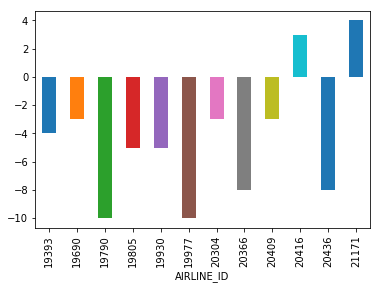

In [12]:
medians = reducedData.groupby(AIRLINE_ID)[ARR_DELAY].median()
medians.plot(kind="bar")

In [13]:

maxMedians = medians[medians == medians.max()]
print(maxMedians)
print("AIRLINE ID with highest median of delayed arrivals independent of delay reasons : {}"
      .format(maxMedians.index[0]))

AIRLINE_ID
21171    4.0
Name: ARR_DELAY, dtype: float64
AIRLINE ID with highest median of delayed arrivals independent of delay reasons : 21171


In [14]:
dataWithDelay = reducedData[reducedData[ARR_DELAY] > 0]
PERCENT = "PERCENT"
count1 = dataWithDelay.groupby(AIRLINE_ID)[AIRLINE_ID].count()
count2 = reducedData.groupby(AIRLINE_ID)[AIRLINE_ID].count()
percentDelays = count1 / count2
statistics = reducedData.groupby(AIRLINE_ID)[ARR_DELAY].describe().assign(PERCENT=percentDelays.values)
statistics

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>count</th>
      <th>mean</th>
      <th>std</th>
      <th>min</th>
      <th>25%</th>
      <th>50%</th>
      <th>75%</th>
      <th>max</th>
      <th>PERCENT</th>
    </tr>
    <tr>
      <th>AIRLINE_ID</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>19393</th>
      <td>20581.0</td>
      <td>3.845537</td>
      <td>30.129042</td>
      <td>-53.0</td>
      <td>-12.0</td>
      <td>-4.0</td>
      <td>9.0</td>
      <td>524.0</td>
      <td>0.389728</td>
    </tr>
    <tr>
      <th>19690</th>
      <td>1428.0</td>
      <td>-0.415266</td>
      <td>20.260302</td>
      <td>-51.0</td>
      <td>-7.0</td>
      <td>-3.0</td>
      <td>4.0</td>
      <td>507.0</td>
      <td>0.359944</td>
    </tr>
    <tr>
      <th>19790</th>
      <td>15497.0</td>
      <td>-2.832419</td>
      <td>42.816381</td>
      <td>-62.0</td>
      <td>-18.0</td>
      <td>-10.0</td>
      <td>0.0</td>
      <td>1079.0</td>
      <td>0.244951</td>
    </tr>
    <tr>
      <th>19805</th>
      <td>17358.0</td>
      <td>3.391520</td>
      <td>43.020275</td>
      <td>-58.0</td>
      <td>-14.0</td>
      <td>-5.0</td>
      <td>9.0</td>
      <td>1316.0</td>
      <td>0.375158</td>
    </tr>
    <tr>
      <th>19930</th>
      <td>3183.0</td>
      <td>2.508325</td>
      <td>39.504376</td>
      <td>-70.0</td>
      <td>-17.0</td>
      <td>-5.0</td>
      <td>9.0</td>
      <td>391.0</td>
      <td>0.387056</td>
    </tr>
    <tr>
      <th>19977</th>
      <td>9585.0</td>
      <td>-1.133438</td>
      <td>40.568681</td>
      <td>-70.0</td>
      <td>-19.0</td>
      <td>-10.0</td>
      <td>4.0</td>
      <td>1107.0</td>
      <td>0.285968</td>
    </tr>
    <tr>
      <th>20304</th>
      <td>10730.0</td>
      <td>9.286859</td>
      <td>48.306256</td>
      <td>-56.0</td>
      <td>-13.0</td>
      <td>-3.0</td>
      <td>12.0</td>
      <td>1316.0</td>
      <td>0.419851</td>
    </tr>
    <tr>
      <th>20366</th>
      <td>9987.0</td>
      <td>-1.977871</td>
      <td>33.169977</td>
      <td>-61.0</td>
      <td>-16.0</td>
      <td>-8.0</td>
      <td>2.0</td>
      <td>900.0</td>
      <td>0.279563</td>
    </tr>
    <tr>
      <th>20409</th>
      <td>5359.0</td>
      <td>8.162157</td>
      <td>40.956445</td>
      <td>-54.0</td>
      <td>-13.0</td>
      <td>-3.0</td>
      <td>14.0</td>
      <td>746.0</td>
      <td>0.442433</td>
    </tr>
    <tr>
      <th>20416</th>
      <td>2464.0</td>
      <td>14.275568</td>
      <td>42.197224</td>
      <td>-42.0</td>
      <td>-9.0</td>
      <td>3.0</td>
      <td>22.0</td>
      <td>892.0</td>
      <td>0.543425</td>
    </tr>
    <tr>
      <th>20436</th>
      <td>1712.0</td>
      <td>6.538551</td>
      <td>57.738824</td>
      <td>-52.0</td>
      <td>-19.0</td>
      <td>-8.0</td>
      <td>8.0</td>
      <td>630.0</td>
      <td>0.338785</td>
    </tr>
    <tr>
      <th>21171</th>
      <td>1084.0</td>
      <td>20.850554</td>
      <td>48.739417</td>
      <td>-51.0</td>
      <td>-9.0</td>
      <td>4.0</td>
      <td>34.0</td>
      <td>294.0</td>
      <td>0.561808</td>
    </tr>
  </tbody>
</table>
</div>

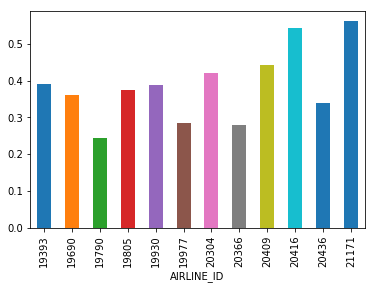

In [15]:
statistics[PERCENT].plot(kind="bar")

In [16]:
maxPercentages = statistics[PERCENT][statistics[PERCENT] == statistics[PERCENT].max()]
print(maxPercentages)
print("AIRLINE ID with highest percentage of delayed arrivals independent of delay reasons : {}"
      .format(maxPercentages.index[0]))

AIRLINE_ID
21171    0.561808
Name: PERCENT, dtype: float64
AIRLINE ID with highest percentage of delayed arrivals independent of delay reasons : 21171
